## Importation des bibliothèques utiles

In [1]:
import numpy as np #calcul numérique (algébre linéaire)
import pandas as pd #manipulation de données
import seaborn as sns #visualisation
from matplotlib import pyplot as plt #visualisation

# **Chargement de la base de données**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_Enthusiasts/creditcard.csv')

In [4]:
#Apperçu de la base de données : 3 premières lignes
data.head(3)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [ ]:
#Apperçu de la base de données : 3 dernières lignes
data.tail(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# **Analyse exploratoire**

## **Analyse de forme**

In [ ]:
#dimensions de la base de données
print("Nombre de transactions : ",data.shape[0])
print("Nombre de variables : ",data.shape[1])

Nombre de transactions :  284807
Nombre de variables :  31


In [ ]:
#Types de variables de la base
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
#Nombre de types de variables de la base
data.dtypes.value_counts()

float64    30
int64       1
dtype: int64

Toutes les variables sont numériques

In [ ]:
#Affichage des valeurs/modalités uniques de la variable cible
data['Class'].unique()

array([0, 1])

In [ ]:
#Données dupliquées
data.duplicated().sum()

1081

Il y a 1081 lignes dupliquées dans le jeu de données. Elles seront supprimées de la base dans la partie prétraitement

In [ ]:
#Données manquantes
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Il n'y a pas de valeur manquante dans la base

## **Analyse Fond**

### **Analyse Univariée**

In [ ]:
#Statistiques descriptive
data_without_class=data.drop("Class", axis=1)
data_without_class.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [ ]:
#Fréquence des modalité de la Variable cible Survived (Nombre)
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

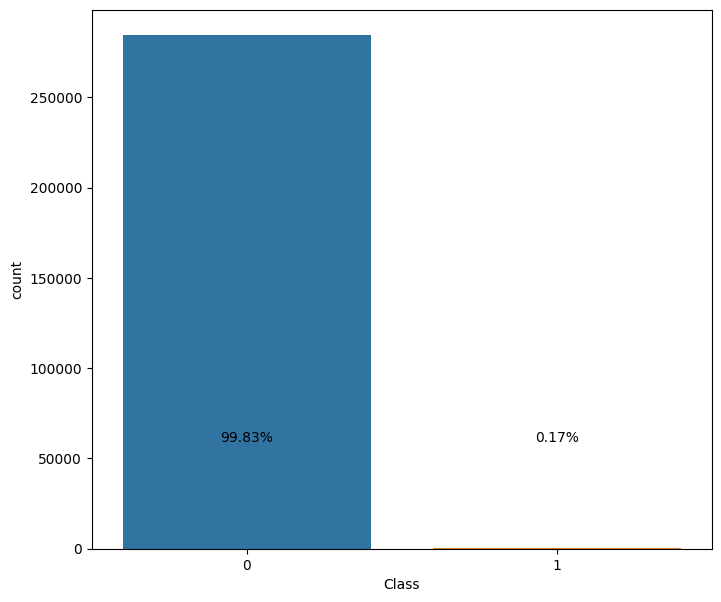

In [ ]:
plt.figure(figsize=(8, 7))
sns.countplot(data=data, x="Class")

# Obtenir le compte de chaque classe
class_counts = round(data["Class"].value_counts(normalize = True)*100,2)

# Ajouter les étiquettes aux barres
for i, count in enumerate(class_counts):
    plt.annotate(str(count) + "%", xy=(i, count), ha="center", va="bottom", xytext=(0, 75),
                 textcoords="offset points")

plt.show()


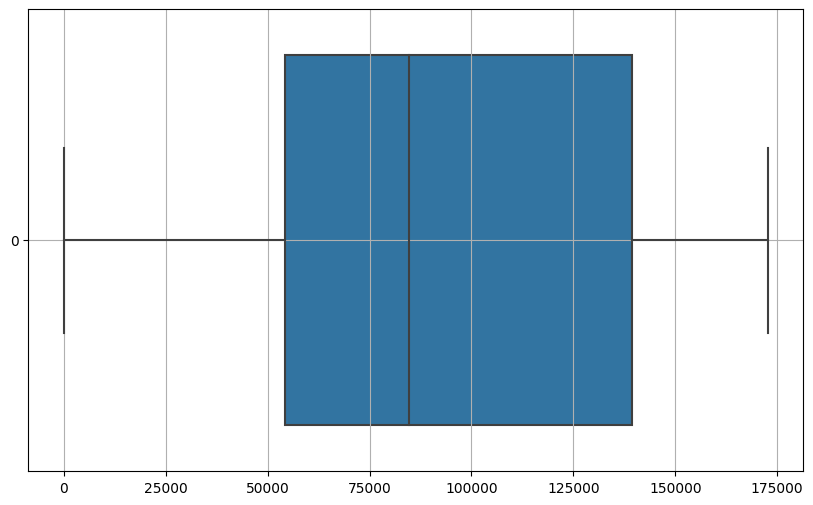

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data['Time'], orient='h')
plt.grid()

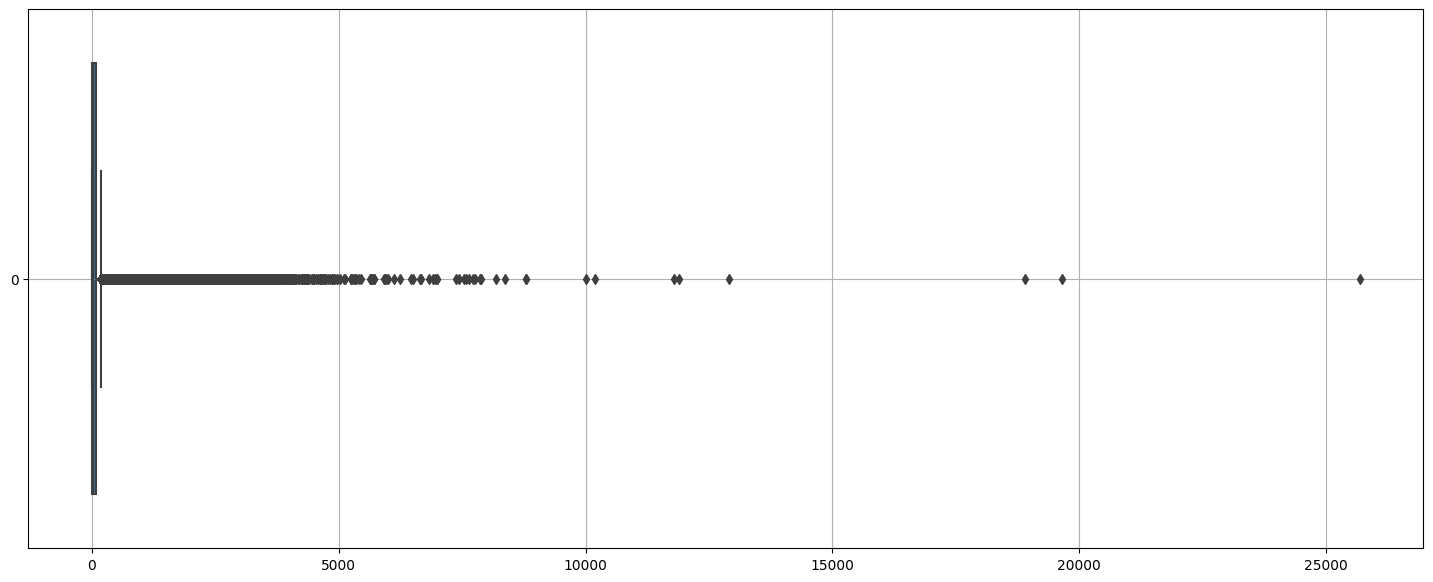

In [ ]:
plt.figure(figsize=(18,7))
sns.boxplot(data['Amount'], orient='h')
plt.grid()

In [ ]:
columns_Class_time_and_amount_and_class = ['Time', 'Amount', 'Class']
data_without_time_and_amount_and_class =  data.drop(columns_Class_time_and_amount_and_class, axis=1)

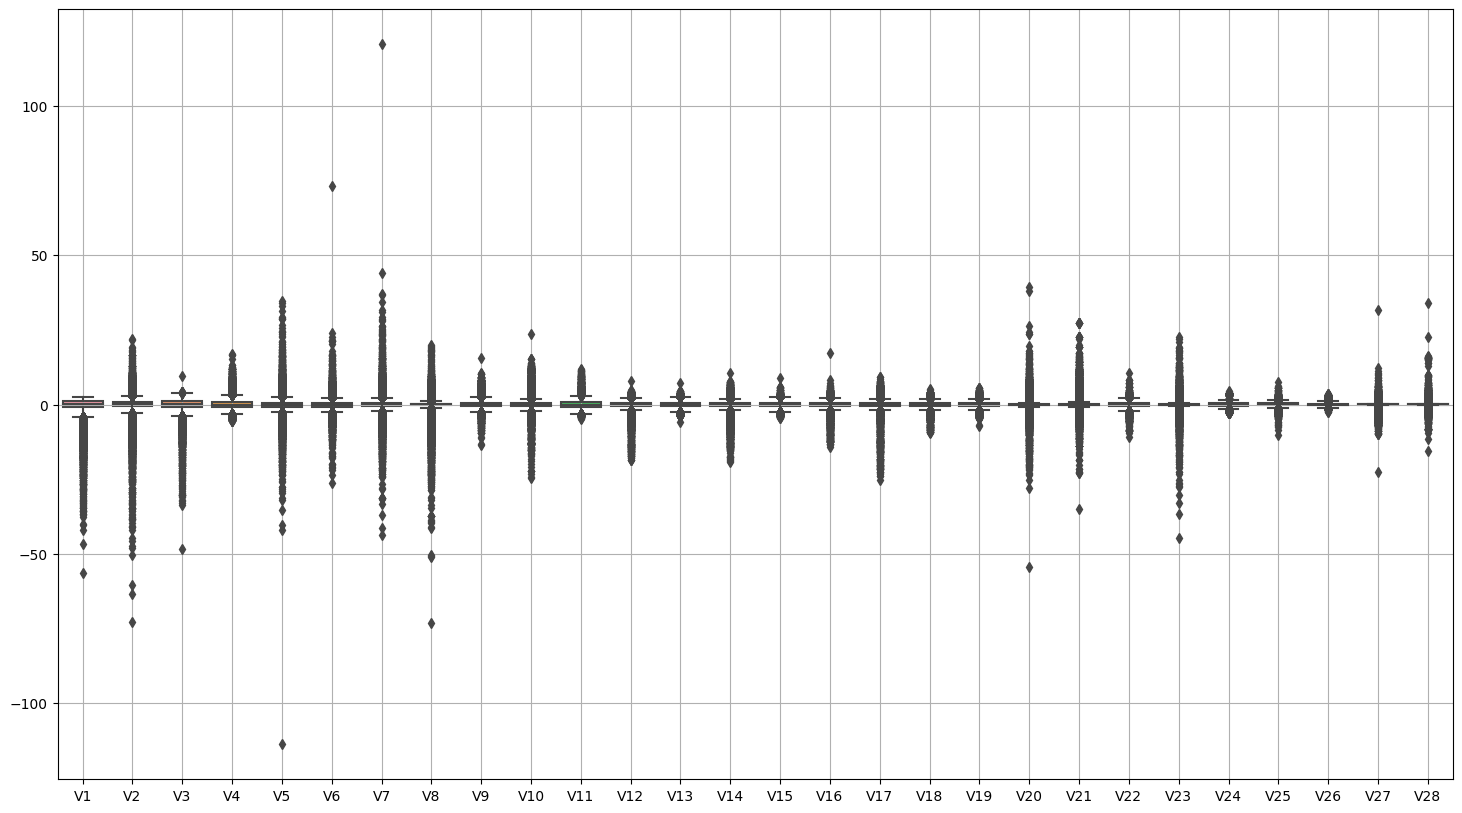

In [ ]:
plt.figure(figsize=(18,10))
sns.boxplot(data_without_time_and_amount_and_class)
plt.grid()

## **Prétraitement**

Suppression des doublons

In [ ]:
data.shape

(284807, 31)

In [5]:
# Ici nous supprimons les lignes dupliquées en ne gardant que la première occurence
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(283726, 31)

Normalisation des variables Time et Amount

In [6]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler est moins sujette aux valeurs abberantes. Nous allons l'utiliser pour normaliser la variable Amount
# Pour Time, nous utiliserons StandardScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

data['amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['time'] = std_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)

In [7]:
amount = data['amount']
time = data['time']

data.drop(['amount', 'time'], axis=1, inplace=True)
data.insert(0, 'amount', amount)
data.insert(1, 'time', time)

data.head()

,amount,time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.774718,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.268530,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.959811,-1.996802,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.411487,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.667362,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


Réechantillonnage

Pour équilibrer nos classes(fraud et Non Fraud), nous allons utiliser la technique de sous-échantillonnage NearMiss.

La méthode NearMiss fonctionne en identifiant les échantillons de la classe majoritaire qui sont proches des échantillons de la classe minoritaire et en les supprimant pour créer un nouvel ensemble de données équilibré.

In [8]:
X = data.drop('Class', axis=1)
y = data['Class']

In [ ]:
print('No Frauds:', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% du jeux de données')
print('Frauds:', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% du jeux de données')

No Frauds: 99.83 % du jeux de données
Frauds: 0.17 % du jeux de données


In [9]:
#Importation de NearMiss
from imblearn.under_sampling import NearMiss
#Instanciation
nr = NearMiss()

In [10]:
#Sous-échantillonnage suivant la variable sexe
X_miss, y_miss = nr.fit_resample(X,y)

In [11]:
#Dimensions
print(X_miss.shape)
print(y_miss.shape)

(946, 30)
(946,)


In [ ]:
X_miss.duplicated().sum()

0

In [12]:
resempled_data = pd.concat([X_miss, y_miss], axis=1)

In [13]:
resempled_data.head()

,amount,time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.253372,0.603609,1.927638,1.320291,-2.600122,3.933076,1.953219,0.034466,0.680236,-0.061683,...,-0.134579,-0.163703,-0.371098,0.013208,-0.049736,0.283204,-0.000671,-0.025361,0.001661,0
1,-0.292032,-0.501002,-0.465511,1.293542,0.909931,0.805013,0.329358,-1.316649,0.877948,-0.202594,...,-0.103891,0.051572,0.129026,-0.145944,0.586362,0.206361,-0.396964,-0.070669,0.051545,0
2,-0.292032,-0.326511,-0.272513,1.275378,0.814107,0.731147,0.461421,-1.122808,0.866315,-0.134538,...,-0.071516,0.018121,0.047025,-0.264227,0.258076,0.237335,-0.366500,0.053858,0.056949,0
3,-0.292032,-0.979847,-0.245036,1.372503,0.703264,0.759897,0.473671,-1.142991,0.907033,-0.136121,...,-0.078736,-0.001793,0.001633,-0.276152,0.231890,0.233290,-0.366147,0.058378,0.062219,0
4,-0.305938,1.504264,1.871702,1.106509,-1.876864,4.064366,1.334907,0.118505,0.288013,0.079950,...,-0.189996,-0.170152,-0.366767,0.143651,0.385827,0.046612,-0.087760,-0.004351,0.007755,0


In [ ]:
print('Nous avons maintenant une nouvelle base de données équilibrée qui comporte',resempled_data.shape[0],'transactions')
print('No Frauds dans les données réechantillonnées', round(resempled_data['Class'].value_counts()[0]/len(resempled_data) * 100,2), '% of the dataset')
print('Frauds dans les données réechantillonnées', round(resempled_data['Class'].value_counts()[1]/len(resempled_data) * 100,2), '% of the dataset')

Nous avons maintenant une nouvelle base de données équilibrée qui comporte 946 transactions
No Frauds dans les données réechantillonnées 50.0 % of the dataset
Frauds dans les données réechantillonnées 50.0 % of the dataset


Distribution of the Classes in the subsample dataset


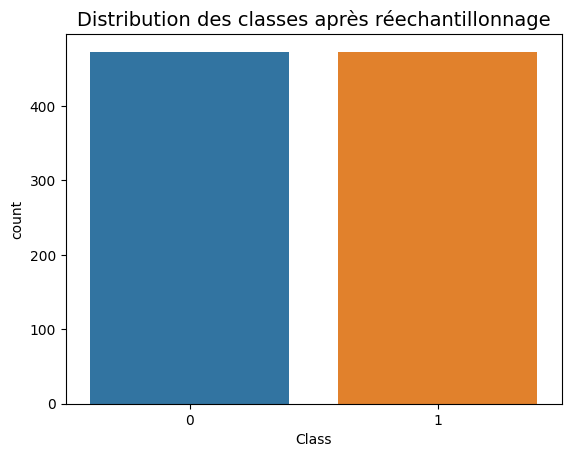

In [14]:
print('Distribution of the Classes in the subsample dataset')

sns.countplot(data=resempled_data, x='Class')

plt.title('Distribution des classes après réechantillonnage', fontsize=14)
plt.show()

Etude de la correlation entre les variables

<Axes: >

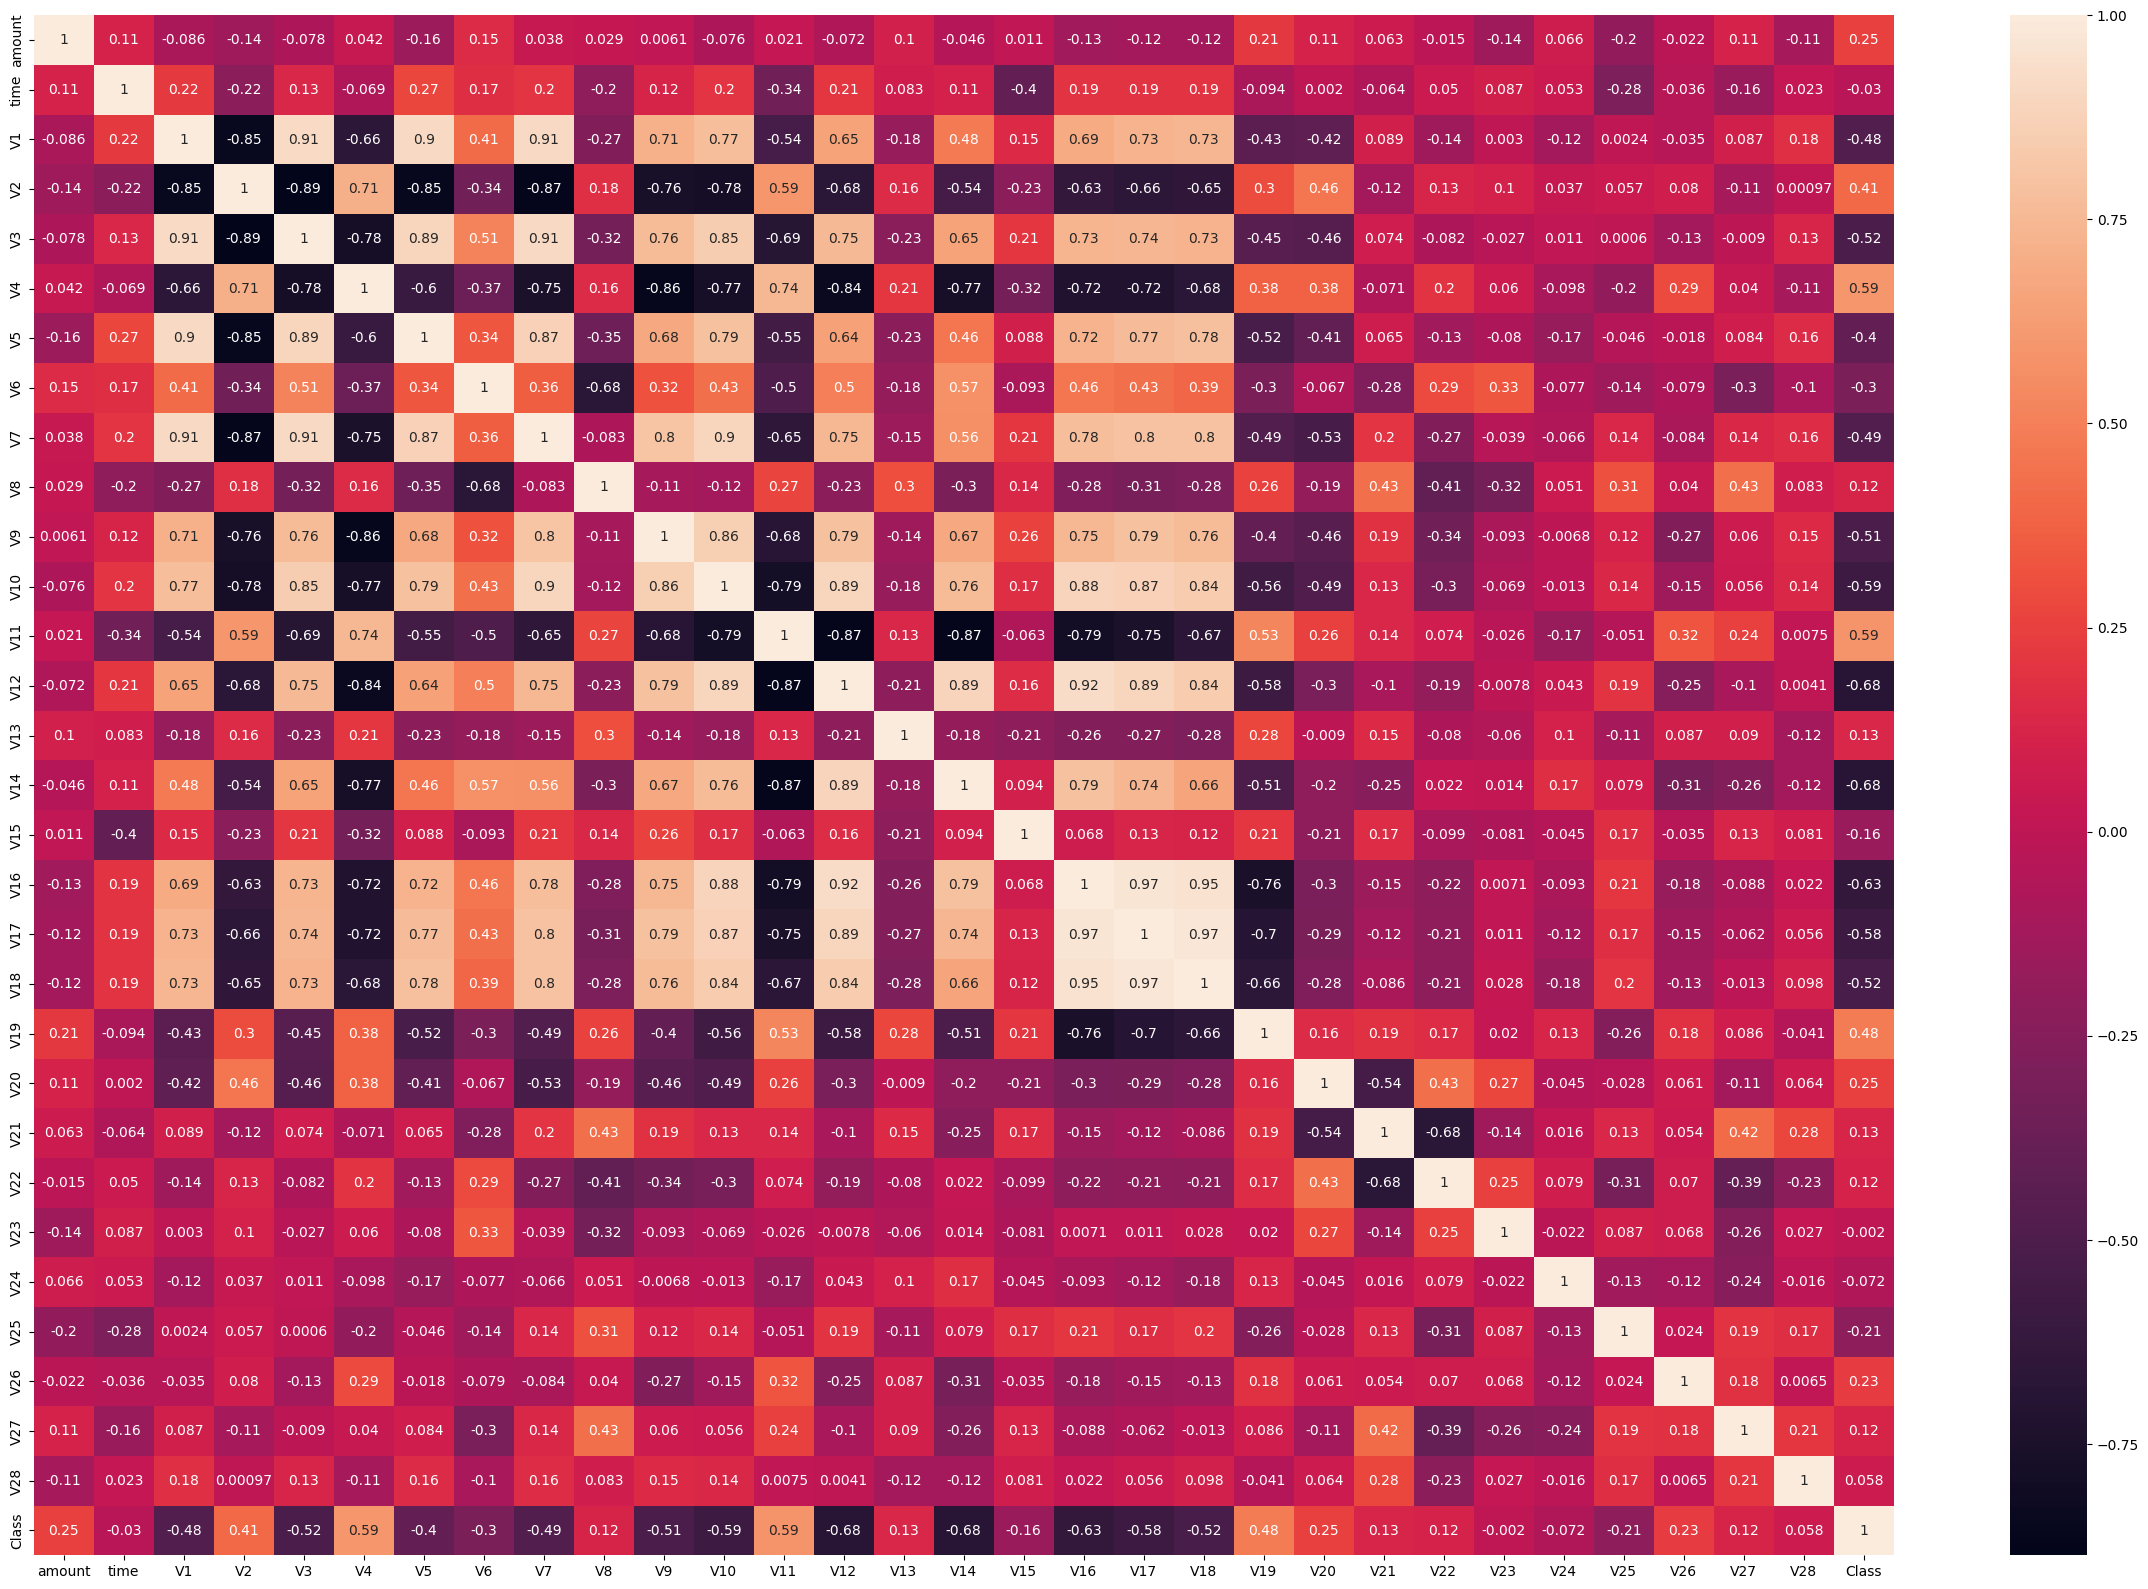

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(resempled_data.corr() , annot = True)

In [15]:
correlation_matrix = resempled_data.corr()

In [16]:
seuil = 0.8
highly_correlated = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > seuil:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated.add(colname_i)



In [17]:
new_resempled_data = resempled_data.drop(columns=highly_correlated)

In [18]:
highly_correlated

{'V10', 'V12', 'V14', 'V16', 'V17', 'V18', 'V2', 'V3', 'V5', 'V7', 'V9'}

In [19]:
new_resempled_data.head()

,amount,time,V1,V4,V6,V8,V11,V13,V15,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.253372,0.603609,1.927638,3.933076,0.034466,-0.061683,1.079724,0.370998,-1.712435,-1.347176,-0.134579,-0.163703,-0.371098,0.013208,-0.049736,0.283204,-0.000671,-0.025361,0.001661,0
1,-0.292032,-0.501002,-0.465511,0.805013,-1.316649,-0.202594,0.140193,-0.429253,0.866684,-0.553549,-0.103891,0.051572,0.129026,-0.145944,0.586362,0.206361,-0.396964,-0.070669,0.051545,0
2,-0.292032,-0.326511,-0.272513,0.731147,-1.122808,-0.134538,-0.188011,-0.543467,0.896879,-0.439844,-0.071516,0.018121,0.047025,-0.264227,0.258076,0.237335,-0.366500,0.053858,0.056949,0
3,-0.292032,-0.979847,-0.245036,0.759897,-1.142991,-0.136121,-0.114224,-0.629868,0.931965,-0.482305,-0.078736,-0.001793,0.001633,-0.276152,0.231890,0.233290,-0.366147,0.058378,0.062219,0
4,-0.305938,1.504264,1.871702,4.064366,0.118505,0.079950,1.200107,-0.124198,-1.831271,-1.458427,-0.189996,-0.170152,-0.366767,0.143651,0.385827,0.046612,-0.087760,-0.004351,0.007755,0


<Axes: >

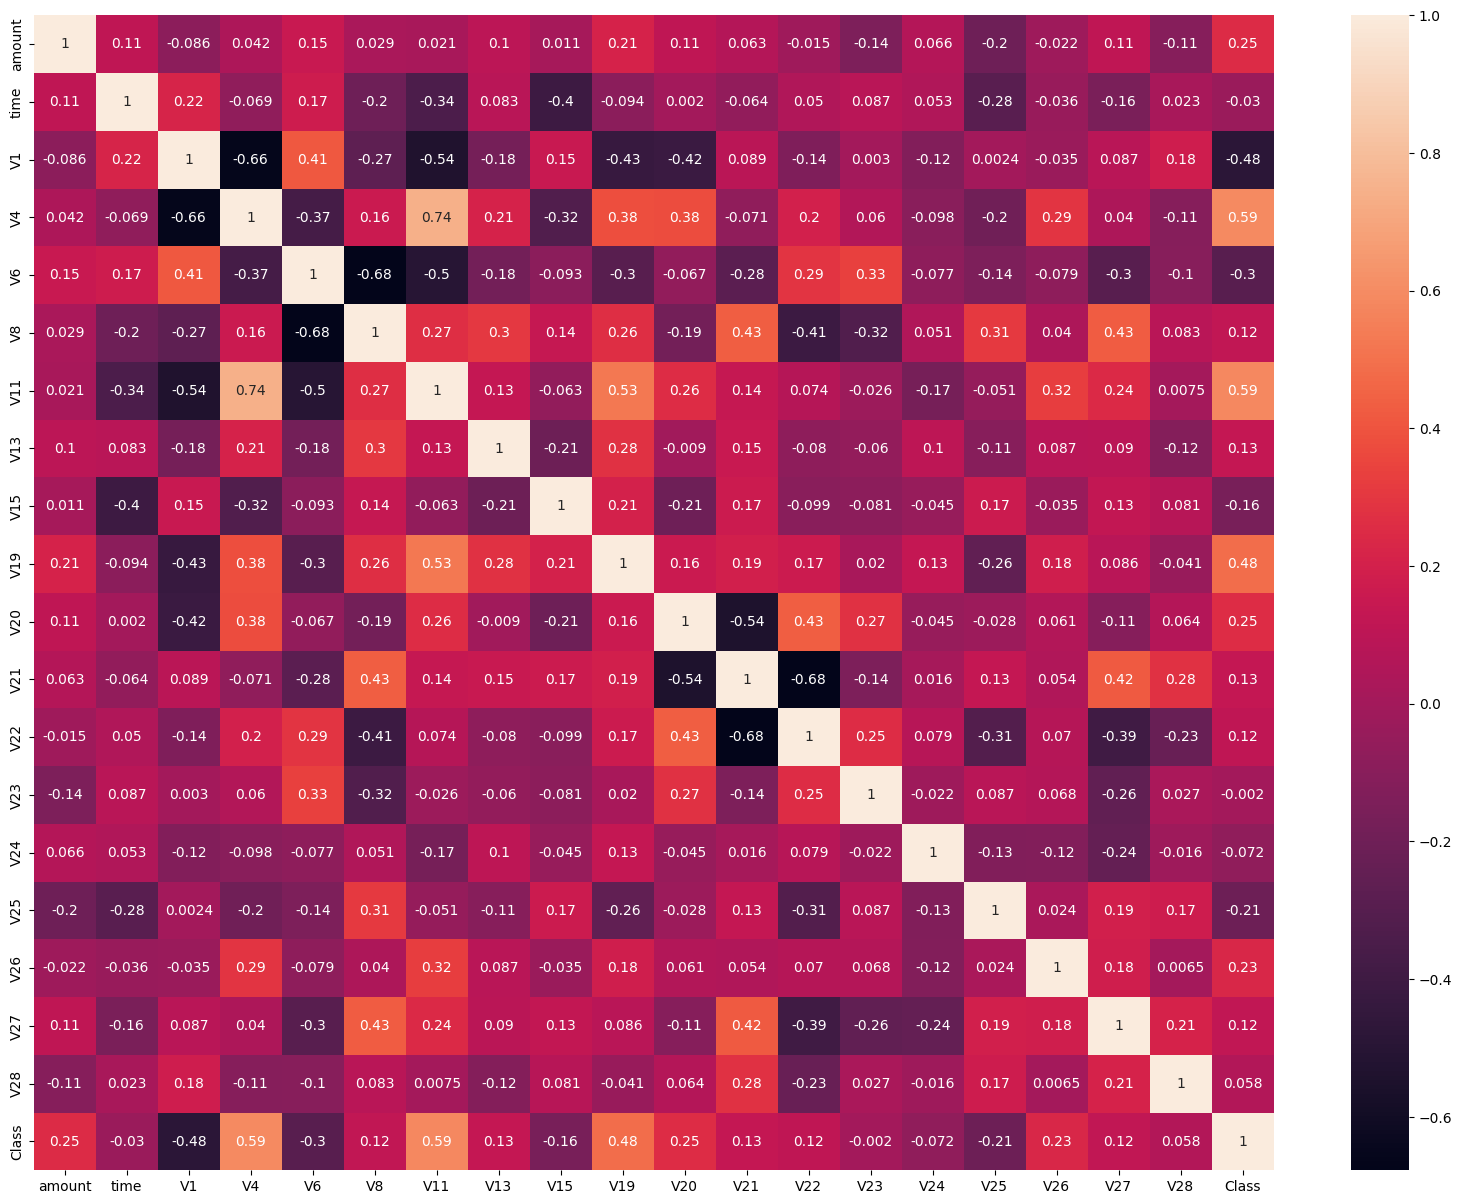

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(new_resempled_data.corr() , annot = True)

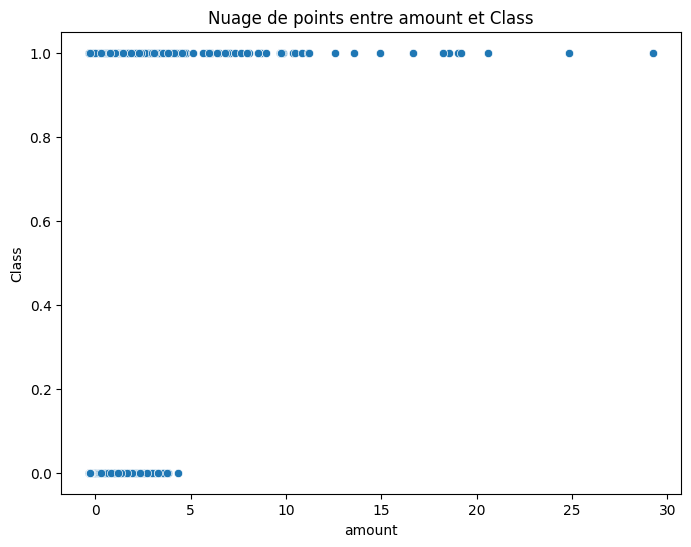

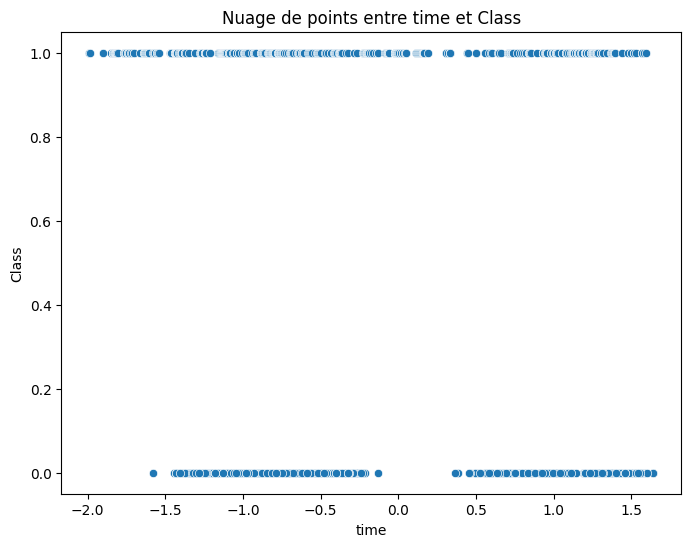

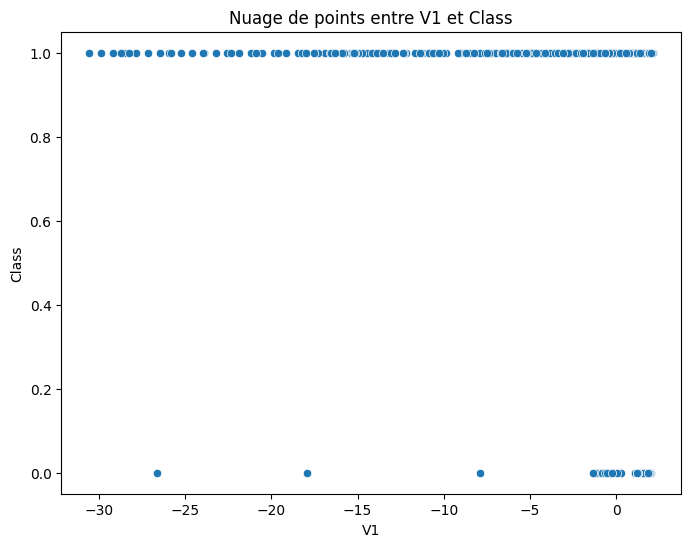

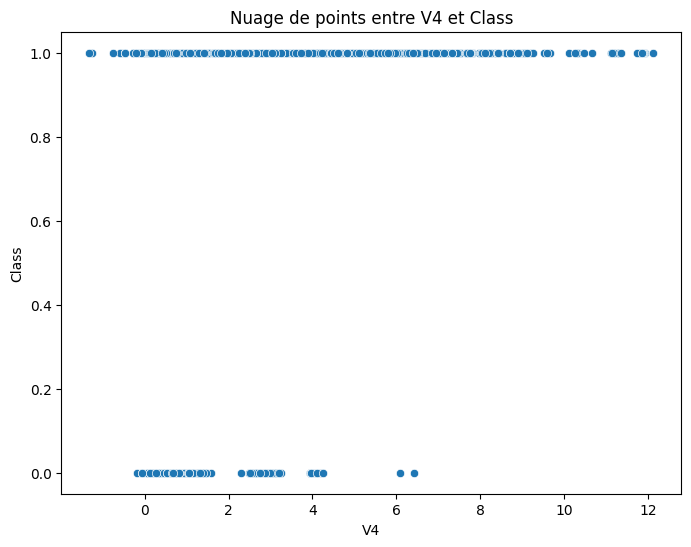

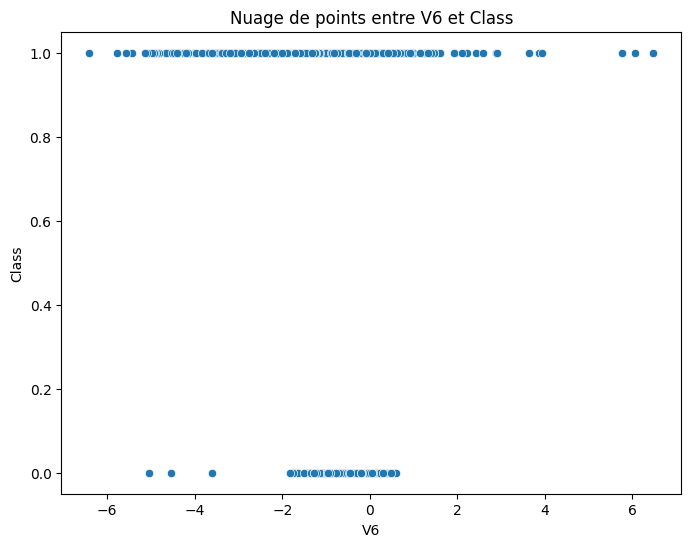

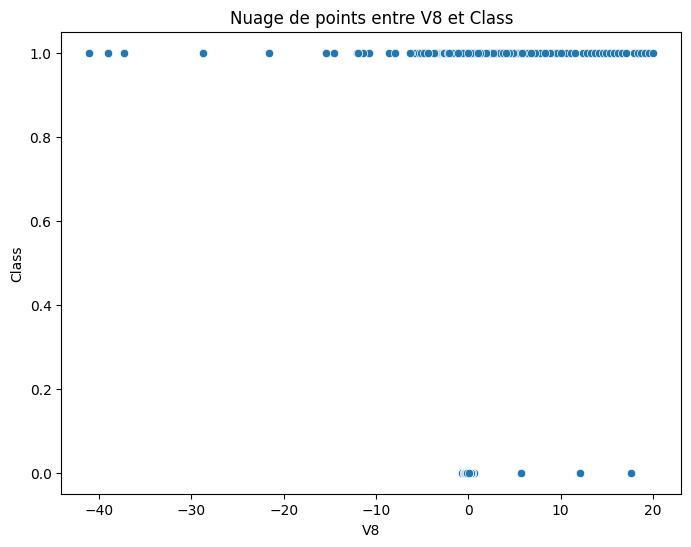

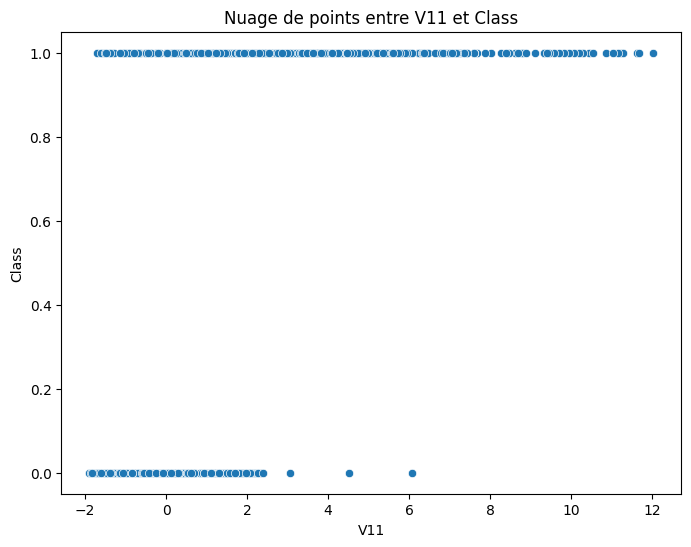

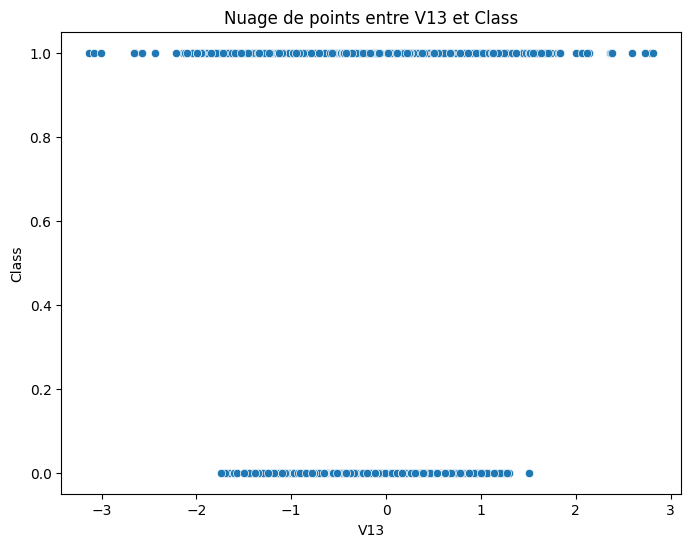

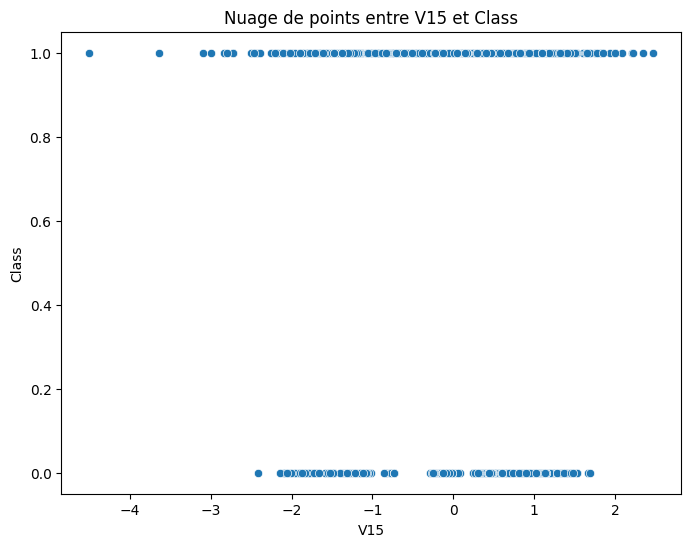

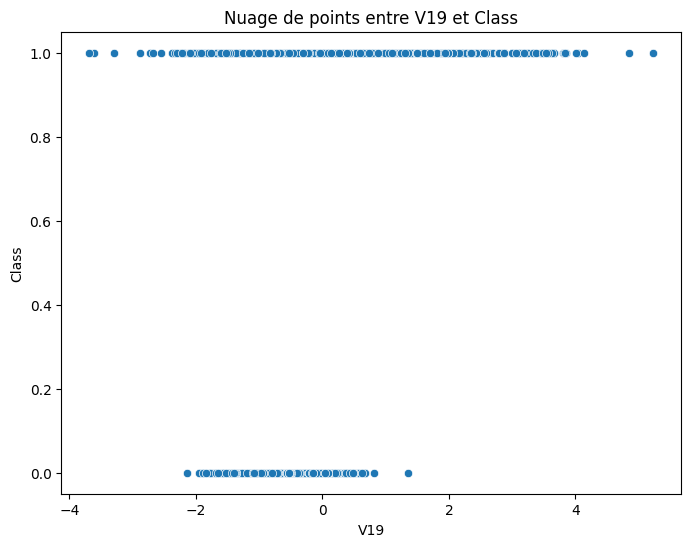

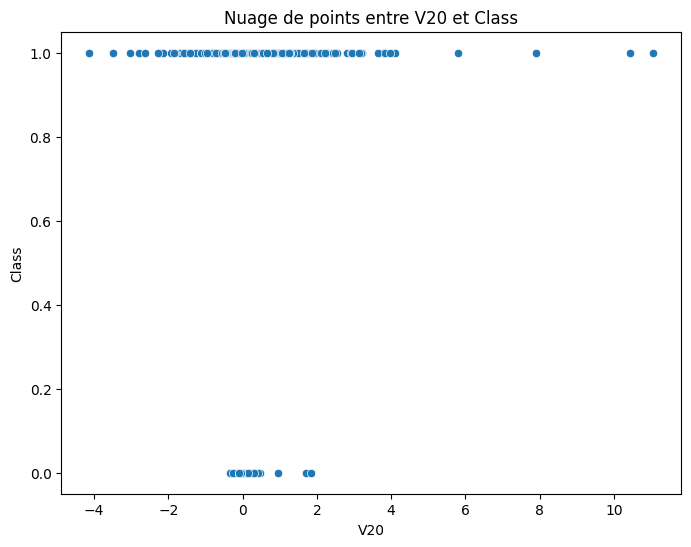

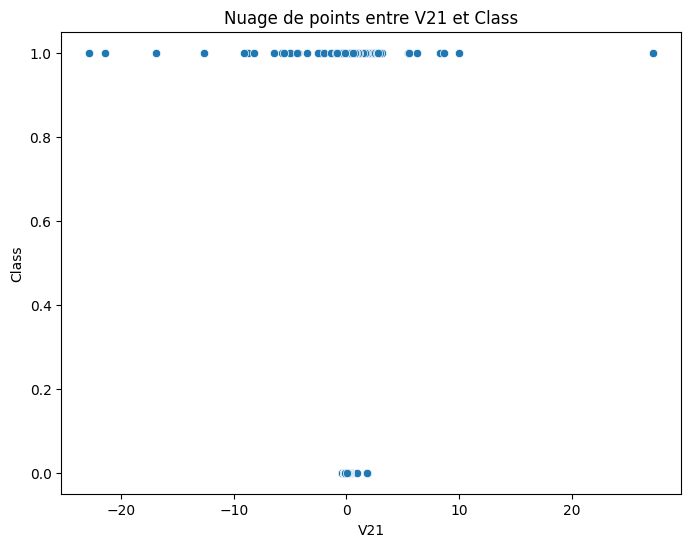

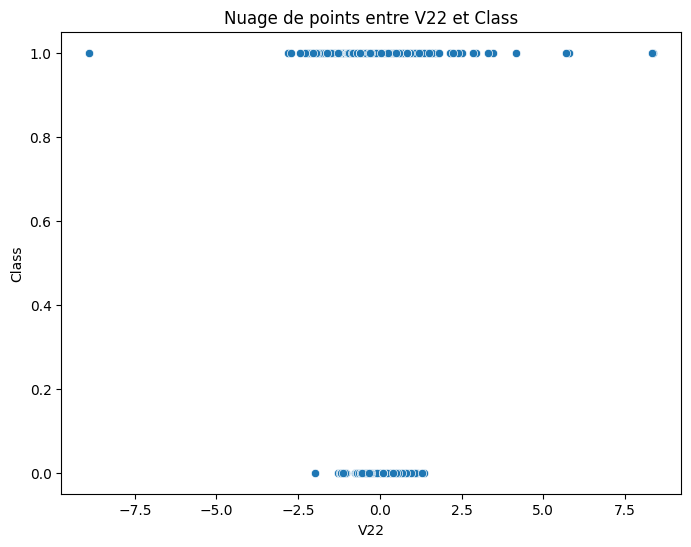

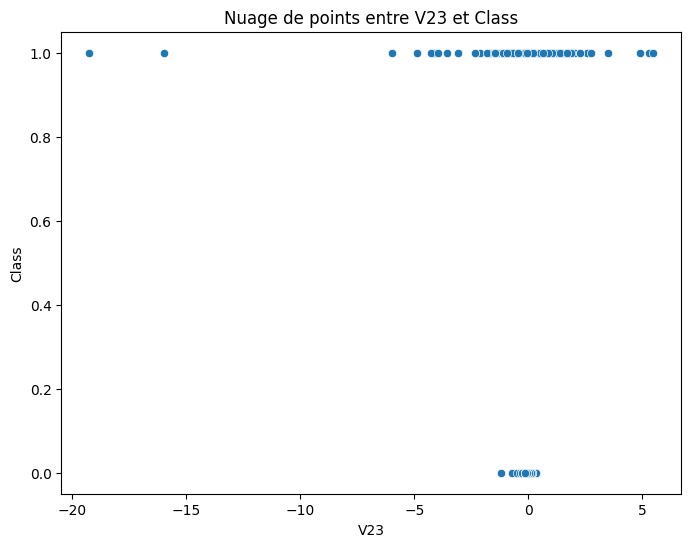

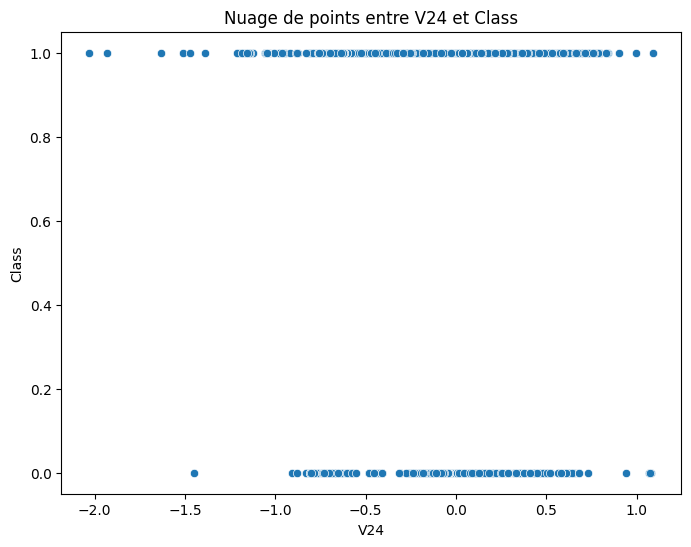

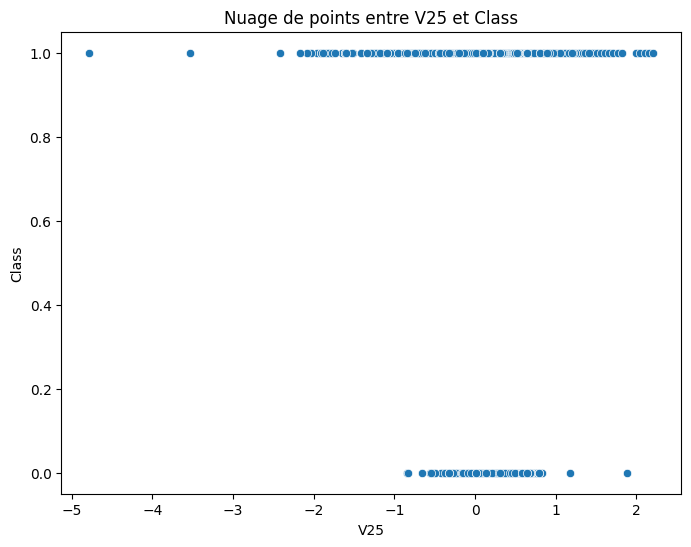

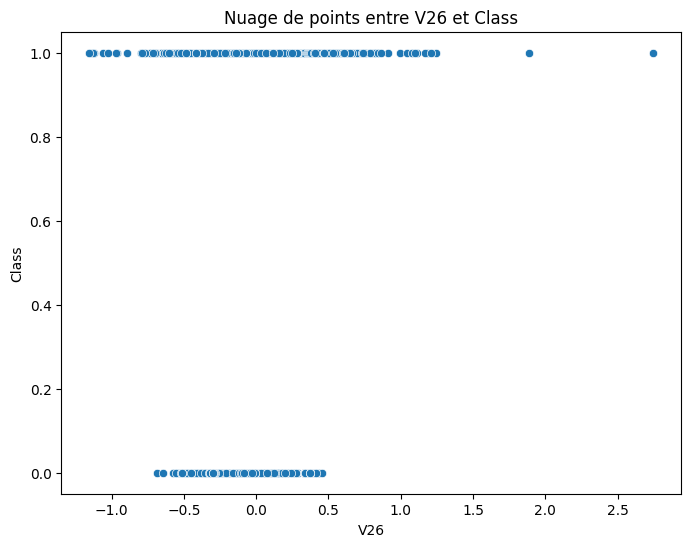

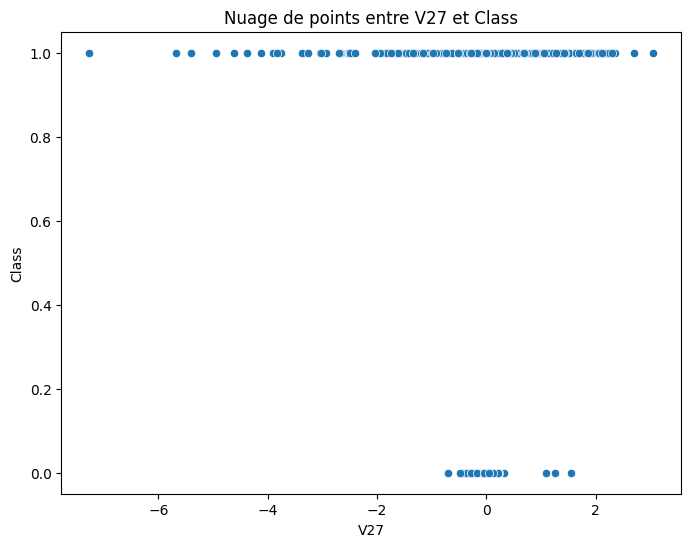

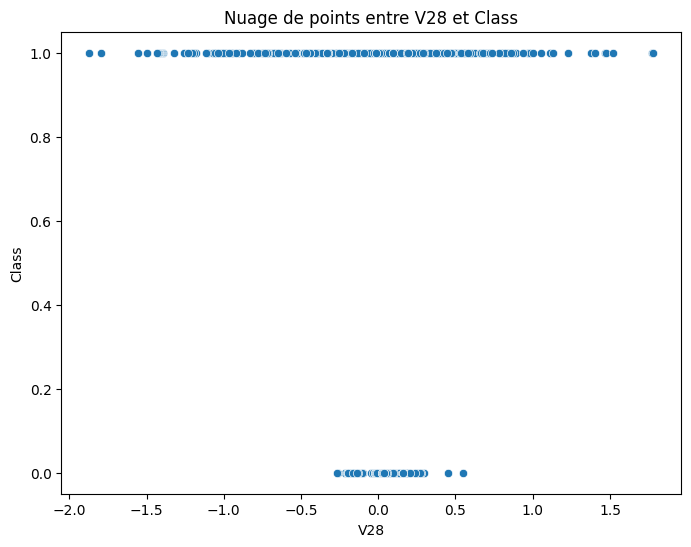

In [20]:
# Sélectionner toutes les colonnes sauf "Class"
columns = new_resempled_data.columns.drop("Class")

# Tracer le nuage de points
for column in columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=new_resempled_data, x=column, y="Class")
    plt.xlabel(column)
    plt.ylabel("Class")
    plt.title(f"Nuage de points entre {column} et Class")
    plt.show()


Division de la base en données d'entrainement et de test

In [21]:
X_new = new_resempled_data.drop('Class', axis=1)
y_new = new_resempled_data['Class']

In [22]:
new_resempled_data.shape

(946, 20)

In [23]:
X_new.shape

(946, 19)

In [24]:
y_new.shape

(946,)

In [25]:
#importation de la fonction de découpage (train_test_split)
from sklearn.model_selection import train_test_split as tts

#découpage 80 - 20
X_new_train , X_new_test, y_new_train, y_new_test = tts(X_new , y_new , test_size = 0.2 , random_state = 42 , stratify = y_new)

In [26]:
#vérification des dimensions
print("Dimensions de X_new_train", X_new_train.shape)
print("Dimensions de y_new_train", y_new_train.shape)

Dimensions de X_new_train (756, 19)
Dimensions de y_new_train (756,)


# **Modélisation**

## **Entrainement standard**

In [27]:
#importation du f1_score
from sklearn.metrics import f1_score
#importation du la fonction time()
from time import time

from sklearn.metrics import average_precision_score

In [28]:
#Définition de fonction
def modelisation(ModelsList , X_train_scaled , y_train , X_test_scaled , y_test ):
  scores = []
  for mod in ModelsList :
    try :
      model = mod(random_state = 42) #instanciation avec random_state
    except TypeError :
      model = mod() #instanciation sans random_state
    debut = time() #calcul du temps de début
    model.fit(X_train_scaled , y_train) #entrainement
    fin = time() #calcul du temps de fin
    y_pred_train = model.predict(X_train_scaled) #calcul des prédictions par rapport aux données d'entrainement
    y_pred_test = model.predict(X_test_scaled) #calcul des prédictions par rapport aux données de test

    # Obtention des prédictions de probabilité du modèle
    #y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # Remplacez X_test par vos données de test

    # Calcul de l'AUPRC
    #auprc = average_precision_score(y_test, y_pred_proba)  # Remplacez y_test par vos étiquettes de test

    scores.append({"Modeles" : type(model).__name__ ,
                   "temps_apprentissage" : fin - debut,
                   "f1_train_score" : f1_score(y_train , y_pred_train) ,
                   "f1_test_score" : f1_score(y_test , y_pred_test),
                   #"auprc" : auprc
                   })
  return pd.DataFrame(scores)

In [29]:
  #importation des algorithmes
  from sklearn.linear_model import LogisticRegression
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.svm import SVC
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier, GradientBoostingClassifier

In [30]:
#liste de modeles
ModelsList = [RandomForestClassifier , AdaBoostClassifier, GradientBoostingClassifier,
              DecisionTreeClassifier , KNeighborsClassifier, LogisticRegression, SVC]

In [31]:
#premier essai de modélisation
scores = modelisation(ModelsList , X_new_train , y_new_train , X_new_test , y_new_test)
scores.set_index("Modeles" , inplace = True)
scores

,temps_apprentissage,f1_train_score,f1_test_score
Modeles,,,
RandomForestClassifier,0.331746,1.000000,0.989474
AdaBoostClassifier,0.188463,0.989362,0.963731
GradientBoostingClassifier,0.525060,0.998675,0.973822
DecisionTreeClassifier,0.014656,1.000000,0.942408
KNeighborsClassifier,0.001601,0.941989,0.920455
LogisticRegression,0.020198,0.930556,0.909091
SVC,0.018740,0.931276,0.932584


In [32]:
#normalisation du temps_apprentissage (c'est-à-dire que les valeurs seront mises à l'échelle entre 0 et 1 en fonction de la valeur maximale de la colonne.)
scores["temps_apprentissage"] = scores["temps_apprentissage"]/scores["temps_apprentissage"].max()
scores

,temps_apprentissage,f1_train_score,f1_test_score
Modeles,,,
RandomForestClassifier,0.631825,1.000000,0.989474
AdaBoostClassifier,0.358936,0.989362,0.963731
GradientBoostingClassifier,1.000000,0.998675,0.973822
DecisionTreeClassifier,0.027914,1.000000,0.942408
KNeighborsClassifier,0.003048,0.941989,0.920455
LogisticRegression,0.038469,0.930556,0.909091
SVC,0.035691,0.931276,0.932584


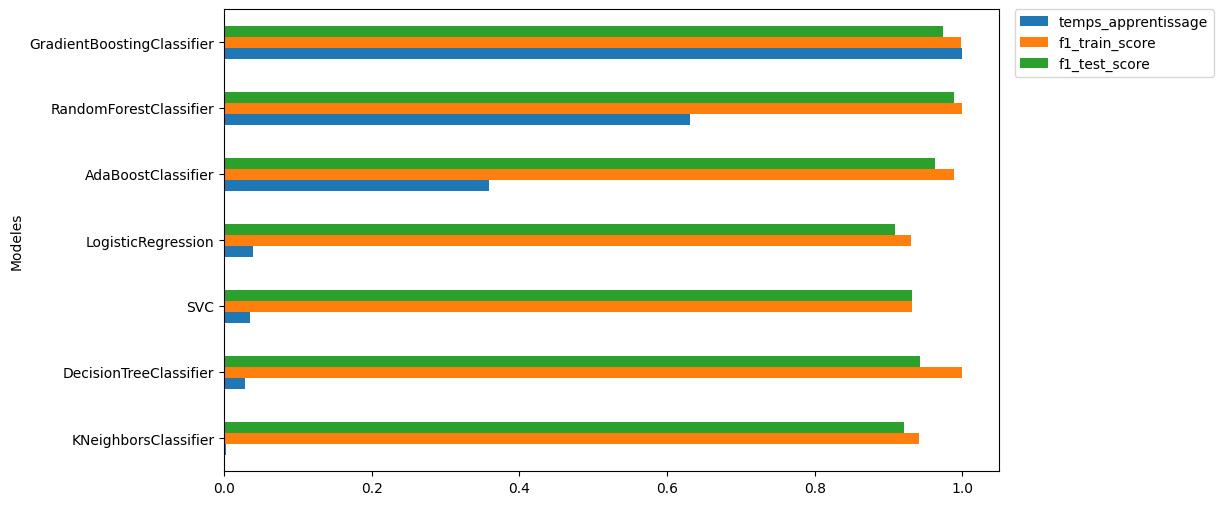

In [33]:
import matplotlib.pyplot as plt

scores = scores.sort_values(by=['temps_apprentissage', 'f1_test_score', 'f1_train_score'])

# Tracer le graphique
ax = scores.plot.barh()

# Augmenter la taille du graphique
fig = plt.gcf()
fig.set_size_inches(10, 6)  # Modifiez les dimensions (largeur, hauteur) selon vos besoins

# Déplacer la légende
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

# Afficher le graphique
plt.show()


## **Entrainement par validaiton croisée**

In [34]:
#importation de la fonction de validation croisée
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

In [35]:
#définition du nombre de split
cv = StratifiedKFold(n_splits = 5)

In [36]:
#Définition de fonction de validation croisee
def crossValidation(ModelsList , X_train_scaled , y_train , X_test_scaled , y_test):
  scores = []
  for mod in ModelsList :
    try :
      model = mod(random_state = 42) #instanciation avec random_state
    except TypeError :
      model = mod() #instanciation sans random_state
    debut = time() #calcul du temps de début
    score = cross_validate(estimator = model , X = X_train_scaled , y = y_train , cv = cv ,
               scoring = 'f1', n_jobs = -1 , return_train_score = True)  #entrainement
    fin = time() #calcul du temps de fin



    model.fit(X_train_scaled , y_train) #entrainement
    y_pred_train = model.predict(X_train_scaled) #calcul des prédictions par rapport aux données d'entrainement
    y_pred_test = model.predict(X_test_scaled) #calcul des prédictions par rapport aux données de test



    scores.append({"Modeles" : type(model).__name__ ,
                   "temps_apprentissage" : fin - debut,
                   "f1_train_score" : score['train_score'].mean() ,
                   "f1_test_score" : score['test_score'].mean(),
                   })
  return pd.DataFrame(scores)

In [37]:
#entrainement par validation croisée
scores = crossValidation(ModelsList ,X_new_train, y_new_train , X_new_test , y_new_test)
scores.set_index("Modeles" , inplace = True)
scores

,temps_apprentissage,f1_train_score,f1_test_score
Modeles,,,
RandomForestClassifier,3.183643,1.000000,0.953151
AdaBoostClassifier,0.739395,0.992008,0.943756
GradientBoostingClassifier,1.695165,1.000000,0.945438
DecisionTreeClassifier,0.082166,1.000000,0.909783
KNeighborsClassifier,0.176440,0.935589,0.920693
LogisticRegression,0.098479,0.931190,0.917254
SVC,0.137994,0.930130,0.924714


In [38]:
#normalisation du temps_apprentissage
scores["temps_apprentissage"] = scores["temps_apprentissage"]/scores["temps_apprentissage"].max()
scores

,temps_apprentissage,f1_train_score,f1_test_score
Modeles,,,
RandomForestClassifier,1.000000,1.000000,0.953151
AdaBoostClassifier,0.232248,0.992008,0.943756
GradientBoostingClassifier,0.532461,1.000000,0.945438
DecisionTreeClassifier,0.025809,1.000000,0.909783
KNeighborsClassifier,0.055421,0.935589,0.920693
LogisticRegression,0.030933,0.931190,0.917254
SVC,0.043345,0.930130,0.924714


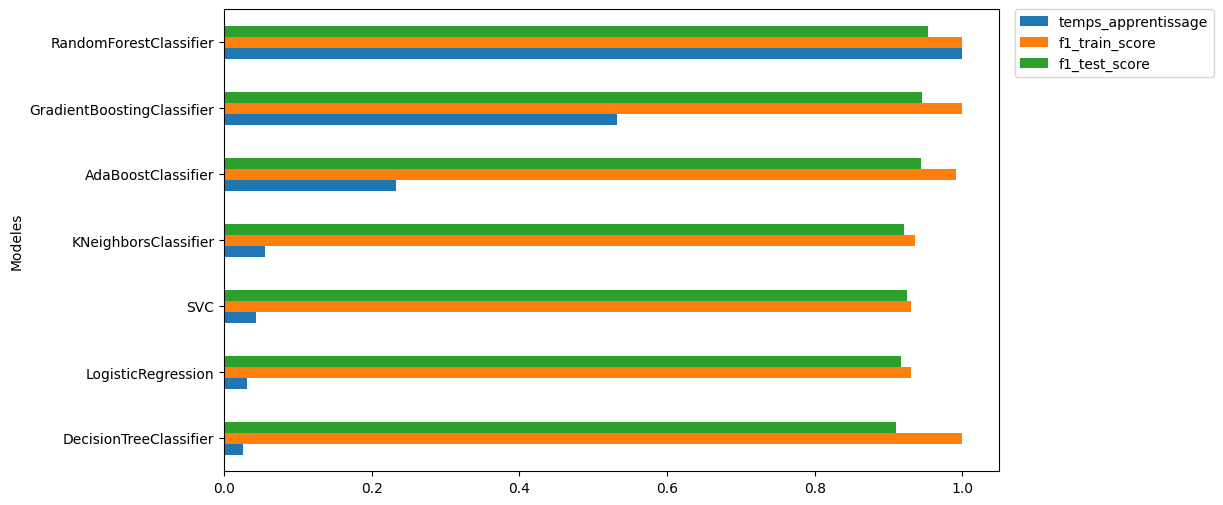

In [39]:
import matplotlib.pyplot as plt

scores = scores.sort_values(by=['temps_apprentissage', 'f1_test_score', 'f1_train_score'])

# Tracer le graphique
ax = scores.plot.barh()

# Augmenter la taille du graphique
fig = plt.gcf()
fig.set_size_inches(10, 6)  # Modifiez les dimensions (largeur, hauteur) selon vos besoins

# Déplacer la légende
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

# Afficher le graphique
plt.show()


Nous allons retenir le modèle SVC puisqu'il a le sens de la généralisation.
Elle a un score de 91.7%
Nous allons l'optimiser pour plus de performances

## **Optimisation de l'algorithme SVC**

In [40]:
#dictionnaire d'hyperparamètres
hyperParamsDict = {'C' : [0.1 , 1 , 10 , 100, 1000] ,
                   'kernel' : ['linear' , 'rbf' , 'poly'],
                   'gamma' : [0.0001 , 0.001 , 0.01 , 1]}

In [41]:
#importation de l'algorithme d'optimisation (grille de recherche)
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
#instanciation
grid = RandomizedSearchCV(estimator = SVC() , param_distributions = hyperParamsDict , scoring = 'f1' , n_jobs = -1 , cv = cv , n_iter = 20)

In [42]:
#entrainement
grid.fit(X_new_train, y_new_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=SVC(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [0.0001, 0.001, 0.01, 1],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   scoring='f1')

In [43]:
#Meilleur combinaison d'hyperparamètres
grid.best_params_

{'kernel': 'rbf', 'gamma': 1, 'C': 10}

In [44]:
#instanciation du SVC avec la meilleur combinaison
svc = SVC(**grid.best_params_)

In [45]:
#entrainement
svc.fit(X_new_train, y_new_train)

SVC(C=10, gamma=1)

In [46]:
#score d'entrainement
pred_train = svc.predict(X_new_train)
f1_score(y_new_train , pred_train)

0.9973474801061007

In [47]:
#score de test
pred_test = svc.predict(X_new_test)
f1_score(y_new_test , pred_test)

0.979381443298969

Nous avons à présent, un score assez satisfaisante

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = svc.predict(X_new_test)

accuracy = accuracy_score(y_new_test, y_pred)
precision = precision_score(y_new_test, y_pred)
recall = recall_score(y_new_test, y_pred)
f1 = f1_score(y_new_test, y_pred)


In [49]:
print('accuracy:',accuracy)
print('precision:',precision)
print('recall:',recall)
print('f1_score:',f1)

accuracy: 0.9789473684210527
precision: 0.9595959595959596
recall: 1.0
f1_score: 0.979381443298969


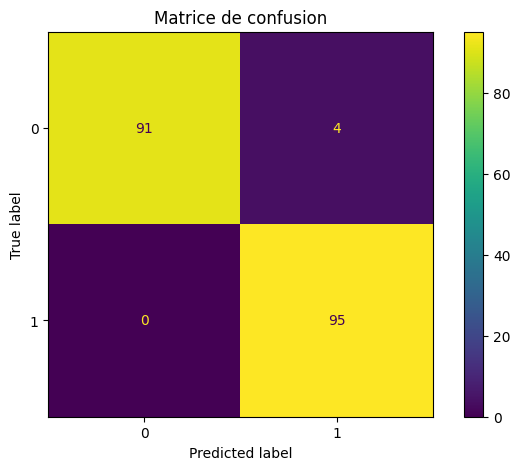

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Test de la précision du modèle
y_pred = svc.predict(X_new_test)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_new_test, y_pred),
    display_labels=["0", "1"]
)

cmp.plot(ax=ax)
plt.title('Matrice de confusion')
plt.show();

# Testons les performances du modèle sur notre jeu de données initial

In [51]:
data_prepared = data.drop(columns=highly_correlated)

In [52]:
data_prepared.duplicated().sum()

0

In [53]:
X = data_prepared.drop('Class', axis=1)
y = data_prepared['Class']

In [54]:
print(X.shape)
print(y.shape)

(283726, 19)
(283726,)


In [55]:
#importation de la fonction de découpage (train_test_split)
from sklearn.model_selection import train_test_split as tts

#découpage 80 - 20
X_train , X_test, y_train, y_test = tts(X , y , test_size = 0.2 , random_state = 42 , stratify = y)

In [ ]:
model = SVC(**grid.best_params_)
model.fit(X_train, y_train)


In [ ]:
y_pred_ = model.predict(X_test)

accuracy_ = accuracy_score(y_test, y_pred_)
precision_ = precision_score(y_test, y_pred_)
recall_ = recall_score(y_test, y_pred_)
f1_ = f1_score(y_test, y_pred_)

In [ ]:
print('accuracy:',accuracy_)
print('precision:',precision_)
print('recall:',recall_)
print('f1_score:',f1_)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Test de la précision du modèle
y_pred_ = best_model.predict(X_test)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred_),
    display_labels=["0", "1"]
)

cmp.plot(ax=ax)
plt.title('Matrice de confusion')
plt.show();